In [1]:

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
# collecting the data

In [3]:
import pandas_datareader as pdr

In [4]:
key = '5ffcd3105ca47e8a80025a1b01f36ea41546c8c7'

In [6]:
df = pdr.get_data_tiingo('AAPL' , api_key = key)

In [7]:
df.to_csv('AAPL1.csv')

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('AAPL1.csv')

In [10]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-08-11 00:00:00+00:00,107.93,108.93,107.85,108.52,27484506,25.300711,25.535129,25.281958,25.439018,109938024,0.0,1.0
1,AAPL,2016-08-12 00:00:00+00:00,108.18,108.44,107.78,107.78,18660434,25.359316,25.420264,25.265548,25.265548,74641736,0.0,1.0
2,AAPL,2016-08-15 00:00:00+00:00,109.48,109.54,108.08,108.14,25868209,25.664059,25.678124,25.335874,25.349939,103472836,0.0,1.0
3,AAPL,2016-08-16 00:00:00+00:00,109.38,110.23,109.21,109.63,33794448,25.640617,25.839872,25.600766,25.699221,135177792,0.0,1.0
4,AAPL,2016-08-17 00:00:00+00:00,109.22,109.37,108.34,109.10,25355976,25.603110,25.638273,25.396822,25.574980,101423904,0.0,1.0


In [11]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-08-04 00:00:00+00:00,146.95,147.79,146.28,147.27,56368271,146.729113,147.567851,146.060120,147.048632,56368271,0.00,1.0
1254,AAPL,2021-08-05 00:00:00+00:00,147.06,147.84,146.17,146.98,46397674,146.838948,147.617775,145.950286,146.759068,46397674,0.00,1.0
1255,AAPL,2021-08-06 00:00:00+00:00,146.14,147.11,145.63,146.35,54126813,146.140000,147.110000,145.630000,146.350000,54126813,0.22,1.0
1256,AAPL,2021-08-09 00:00:00+00:00,146.09,146.70,145.52,146.20,48908689,146.090000,146.700000,145.520000,146.200000,48908689,0.00,1.0
1257,AAPL,2021-08-10 00:00:00+00:00,145.60,147.71,145.30,146.44,68823831,145.600000,147.710000,145.300000,146.440000,68823831,0.00,1.0


In [12]:
df.shape

(1258, 14)

In [13]:
#df1= df.reset_index()['close']

In [14]:
df1= df['close']

In [15]:
df1

0       107.93
1       108.18
2       109.48
3       109.38
4       109.22
         ...  
1253    146.95
1254    147.06
1255    146.14
1256    146.09
1257    145.60
Name: close, Length: 1258, dtype: float64

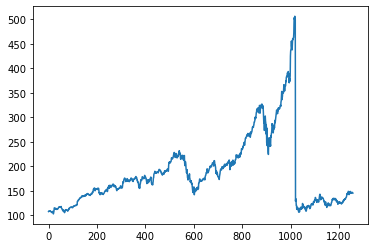

In [16]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [17]:
df1.shape

(1258,)

In [18]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [36]:
df1.shape

(1258, 1)

In [20]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data , test_data = df1[0:training_size , :],df1[training_size : len(df1) , :1]

In [21]:
train_data.shape

(817, 1)

In [22]:
test_data.shape

(441, 1)

In [23]:
t = df1[training_size : len(df1) , :]

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
t.shape

(441, 1)

In [26]:
import numpy 
def create_dataset(dataset , time_stemp = 1):
    dataX , dataY = [] , []
    for i in range(len(dataset)- time_stemp-1):
        a = dataset[i:(i+time_stemp) , 0]
        dataX.append(a)
        dataY.append(dataset[i + time_stemp , 0])
    return numpy.array(dataX) , numpy.array(dataY)

In [27]:
len(train_data)

817

In [28]:
time_stemp = 100
X_train , Y_train = create_dataset(train_data , time_stemp)
X_test , Y_test = create_dataset(test_data , time_stemp)

In [29]:
X_train.shape , Y_train.shape 

((716, 100), (716,))

In [30]:
#reshape input into samples , timestemp , features  which is required in LSTM
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , 1)
X_test  = X_test.reshape(X_test.shape[0] , X_test.shape[1] , 1)

In [31]:
model = Sequential()
model.add(LSTM(200 ,return_sequences = True , input_shape = (100 ,1 ) ))
model.add(LSTM(200 ,return_sequences = True ))
model.add(LSTM(200))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error' , optimizer = 'adam' )



In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 200)          161600    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 200)          320800    
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 803,401
Trainable params: 803,401
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train , Y_train , validation_data = (X_test , Y_test) , epochs = 100 , batch_size = 128 , verbose = 1)

Epoch 1/100
6/6 [==============================] - 17s 2s/step - loss: 0.0202 - val_loss: 0.0562
Epoch 2/100
6/6 [==============================] - 10s 2s/step - loss: 0.0072 - val_loss: 0.0259
Epoch 3/100
6/6 [==============================] - 11s 2s/step - loss: 0.0027 - val_loss: 0.0362
Epoch 4/100
6/6 [==============================] - 9s 2s/step - loss: 0.0021 - val_loss: 0.0231
Epoch 5/100
6/6 [==============================] - 9s 2s/step - loss: 0.0015 - val_loss: 0.0248
Epoch 6/100
6/6 [==============================] - 9s 2s/step - loss: 0.0010 - val_loss: 0.0187
Epoch 7/100
6/6 [==============================] - 9s 2s/step - loss: 6.6843e-04 - val_loss: 0.0175
Epoch 8/100
6/6 [==============================] - 9s 2s/step - loss: 5.0142e-04 - val_loss: 0.0181
Epoch 9/100
6/6 [==============================] - 10s 2s/step - loss: 4.2607e-04 - val_loss: 0.0171
Epoch 10/100
6/6 [==============================] - 13s 2s/step - loss: 4.0010e-04 - val_loss: 0.0175
Epoch 11/100
6/6 [

In [132]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [133]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [134]:
import math

In [135]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train ,train_predict ))

179.52902519293767

In [136]:
math.sqrt(mean_squared_error(Y_test ,test_predict ))

231.0195915420542

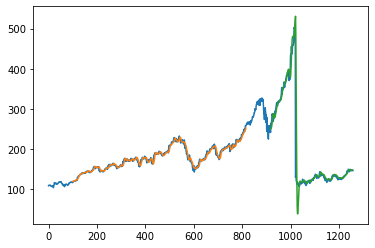

In [137]:
loop_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[loop_back:len(train_predict)+loop_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(loop_back*2)+1 :len(df1)-1 , :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [138]:
trainPredictPlot[loop_back:len(train_predict)+loop_back, :] = train_predict

In [139]:
testPredictPlot[len(train_predict)+(loop_back*2)+1 :len(df1)-1 , :] = test_predict

In [140]:
len(test_data)

441

In [141]:
test_data.shape

(441, 1)

In [142]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [143]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [144]:
len(temp_input)

100

In [145]:
from numpy import array

In [146]:
lst_output = []
n_steps = 100 
i = 0 
while(i<30):
    
    
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("day input".format(i , x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1 , n_steps , 1))
        print(x_input)
        yhat = model.predict(x_input , verbose = 0)
        print("day output".format(i , yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i= i+1
    else:
        x_input = x_input.reshape((1, n_steps , 1))
        print(x_input.shape)
        yhat = model.predict(x_input , verbose =0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i= i+1
        
print(lst_output)

(1, 100, 1)
[0.10911483]
101
day input
[[[0.05027794]
  [0.04816855]
  [0.04208854]
  [0.04332936]
  [0.04486798]
  [0.04531467]
  [0.04161703]
  [0.04720071]
  [0.04931011]
  [0.05650685]
  [0.05727616]
  [0.06147012]
  [0.06757495]
  [0.07411406]
  [0.06975878]
  [0.0776752 ]
  [0.07171928]
  [0.07784892]
  [0.07700516]
  [0.07869267]
  [0.07439944]
  [0.07536728]
  [0.07149593]
  [0.07740222]
  [0.07839488]
  [0.07757594]
  [0.07556581]
  [0.07531765]
  [0.07030474]
  [0.07298491]
  [0.06134604]
  [0.06196645]
  [0.06603633]
  [0.0672027 ]
  [0.0588644 ]
  [0.05653167]
  [0.04873933]
  [0.05419893]
  [0.06035338]
  [0.05742505]
  [0.05390113]
  [0.05350407]
  [0.06000596]
  [0.05534048]
  [0.05948481]
  [0.05898849]
  [0.0588644 ]
  [0.05496824]
  [0.05330554]
  [0.0524866 ]
  [0.05442228]
  [0.05065019]
  [0.05648203]
  [0.05650685]
  [0.05859142]
  [0.05955926]
  [0.05702799]
  [0.06010522]
  [0.06787274]
  [0.06578817]
  [0.0670538 ]
  [0.07112368]
  [0.06782311]
  [0.07238932]
 

In [147]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [148]:
 j=scaler.inverse_transform(lst_output)

In [149]:
j

array([[147.09891017],
       [147.10073256],
       [147.16418888],
       [147.28654104],
       [147.45183189],
       [147.64347681],
       [147.84897428],
       [148.0604583 ],
       [148.27362361],
       [148.4863806 ],
       [148.69781959],
       [148.90753827],
       [149.11530847],
       [149.32096206],
       [149.52433991],
       [149.72530092],
       [149.92375803],
       [150.11963917],
       [150.31294436],
       [150.5036946 ],
       [150.69192592],
       [150.87771638],
       [151.06113503],
       [151.24227796],
       [151.4212112 ],
       [151.59801582],
       [151.77275186],
       [151.9455034 ],
       [152.11633047],
       [152.2852721 ]])

In [150]:
df3 =df1.tolist()
df3.extend(lst_output)

In [151]:
len(df1)

1258

In [152]:
df1.shape

(1258, 1)

In [153]:
scaler.inverse_transform(lst_output).shape

(30, 1)

In [154]:
df2 = df1[1158:]

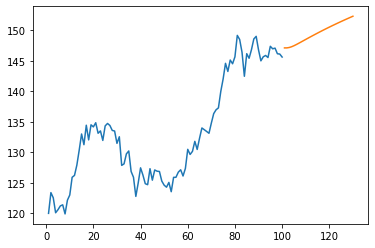

In [155]:
plt.plot(day_new , scaler.inverse_transform(df2))
plt.plot(day_pred , scaler.inverse_transform(lst_output))

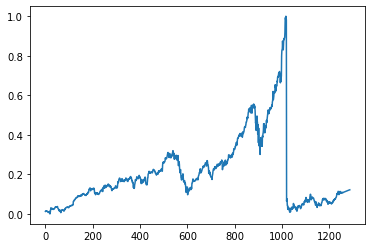

In [156]:
plt.plot(df3[1:])